# **Sobre o Projeto**
---

**Impactos da Poluição do Solo na Saúde Humana**

A poluição do solo é uma ameaça ambiental silenciosa, mas com impactos significativos na saúde pública. Este projeto tem como objetivo analisar um conjunto de dados que relaciona tipos de poluentes encontrados no solo com doenças humanas associadas, levando em consideração variáveis ambientais como pH, umidade, temperatura, concentração dos poluentes, entre outros.

Utilizando técnicas de análise exploratória de dados (EDA), visualizações interativas e modelagem preditiva, buscamos entender como diferentes fatores ambientais e geográficos influenciam o surgimento e a gravidade de doenças como distúrbios neurológicos, cânceres, doenças gastrointestinais e cutâneas, entre outras.

O projeto também examina a relação entre grupos populacionais afetados, medidas de mitigação adotadas em cada região e a efetividade dessas ações. Ao final, insights importantes são destacados para contribuir com iniciativas de prevenção, educação ambiental e políticas públicas de saúde.

Este estudo serve como uma demonstração prática de habilidades em ciência de dados aplicada a problemas ambientais e sociais, integrando análise de dados, visualização e machine learning.

## **Sobre o conjunto de dados**

Este conjunto de dados contém 3.000 registros sintéticos que simulam cenários reais de poluição do solo e doenças relacionadas. Ele captura variáveis ​​ambientais, agrícolas e demográficas para analisar correlações entre contaminação do solo e resultados para a saúde humana. Os dados foram gerados utilizando modelos probabilísticos e conhecimento de domínio, tornando-os adequados para análises exploratórias, aprendizado de máquina e pesquisas em saúde ambiental.

Os principais recursos incluem:

* Tipos e concentrações de poluentes no solo

* Condições do solo e climáticas

* Práticas agrícolas e presença de indústrias próximas

* Tipos de doenças relatadas, gravidade e sintomas

* Segmentos demográficos afetados

* Medidas de mitigação e resolução de casos

# **Análise Exploratória de Dados (EDA)**
---

In [1]:
# Importes necessários
import pandas as pd  # Manipulação de dados
import numpy as np  # Operações numéricas
import matplotlib.pyplot as plt  # Visualização gráfica
import seaborn as sns  # Visualização estatística
import plotly.express as px  # Visualizações interativas
import folium
import json

from sklearn.model_selection import train_test_split  # Separação dos dados
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Pré-processamento
from sklearn.ensemble import RandomForestClassifier  # Modelo de classificação
from sklearn.metrics import classification_report, confusion_matrix  # Avaliação do modelo

In [2]:
# Obtendo o dataset
url = '/content/drive/MyDrive/Aulas/Projetos/Soil Pollution Diseases/Data/soil_pollution_diseases.csv'
df = pd.read_csv(url)

# Visualizando as 5 primeiras linhas do DataFrame
df.head()


,Case_ID,Date_Reported,Region,Country,Pollutant_Type,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,...,Soil_Texture,Soil_Organic_Matter_%,Disease_Type,Disease_Severity,Health_Symptoms,Age_Group_Affected,Gender_Most_Affected,Mitigation_Measure,Case_Resolved,Follow_Up_Required
0,CASE_100000,2024-09-12,Africa,Pakistan,Lead,78.04,8.30,35.6,64.9,62.4,...,Sandy,1.98,Gastrointestinal Disease,Moderate,Breathing Difficulty,Adults,Male,Government Regulation,No,Yes
1,CASE_100001,2024-01-01,Africa,Germany,Lead,16.33,7.96,31.0,73.1,8.2,...,Silty,9.71,Cancer,Mild,Breathing Difficulty,Elderly,Both,Community Awareness,Yes,No
2,CASE_100002,2025-02-24,Europe,Germany,Lead,167.33,5.35,16.4,33.8,121.7,...,Clay,5.49,Gastrointestinal Disease,Severe,Nausea,Children,Both,Soil Remediation,Yes,No
3,CASE_100003,2024-09-24,Asia,USA,Lead,89.23,5.66,31.4,30.5,116.9,...,Silty,3.98,Neurological Disorder,Severe,Fatigue,Adults,Male,Community Awareness,Yes,No
4,CASE_100004,2023-05-24,Africa,India,Chromium,93.93,7.64,17.0,58.6,237.0,...,Loamy,0.94,Skin Disease,Moderate,Breathing Difficulty,Children,Female,Government Regulation,Yes,Yes


In [3]:
# Verificando informações gerais do dataset
df.info()

# Estatísticas descritivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Case_ID                        3000 non-null   object 
 1   Date_Reported                  3000 non-null   object 
 2   Region                         3000 non-null   object 
 3   Country                        3000 non-null   object 
 4   Pollutant_Type                 3000 non-null   object 
 5   Pollutant_Concentration_mg_kg  3000 non-null   float64
 6   Soil_pH                        3000 non-null   float64
 7   Temperature_C                  3000 non-null   float64
 8   Humidity_%                     3000 non-null   float64
 9   Rainfall_mm                    3000 non-null   float64
 10  Crop_Type                      3000 non-null   object 
 11  Farming_Practice               3000 non-null   object 
 12  Nearby_Industry                2418 non-null   o

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,102.745587,6.463747,27.225100,58.222867,200.31660,5.175093
std,55.907366,1.166305,10.084577,21.357711,115.27187,2.761633
min,5.030000,4.500000,10.000000,20.000000,0.00000,0.500000
25%,54.425000,5.457500,18.500000,39.900000,100.60000,2.760000
50%,104.085000,6.450000,27.000000,58.450000,199.00000,5.130000
75%,151.472500,7.490000,35.825000,76.800000,299.75000,7.550000
max,199.990000,8.500000,45.000000,95.000000,399.70000,10.000000


In [4]:
# Verificar dados ausentes
df.isnull().sum()  # Verifique se há dados faltantes

,0
Case_ID,0
Date_Reported,0
Region,0
Country,0
Pollutant_Type,0
Pollutant_Concentration_mg_kg,0
Soil_pH,0
Temperature_C,0
Humidity_%,0
Rainfall_mm,0


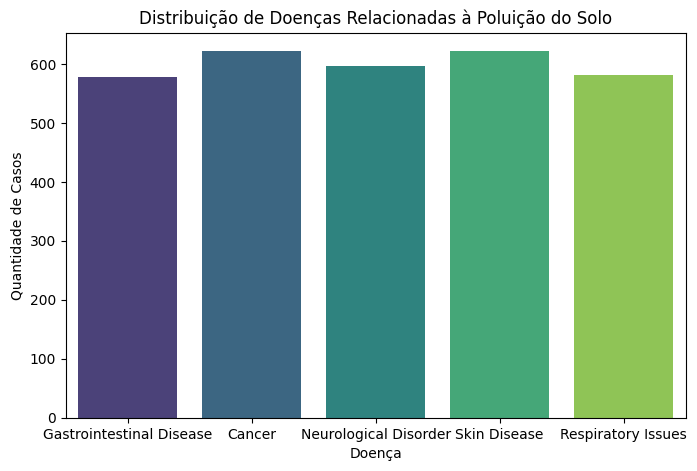

In [5]:
# Visualização da distribuição das doenças associadas à poluição do solo
plt.figure(figsize=(8,5))
sns.countplot(x='Disease_Type', data=df, palette='viridis', hue='Disease_Type')
plt.title("Distribuição de Doenças Relacionadas à Poluição do Solo")  # Adicione um título
plt.xlabel("Doença")  # Nome do eixo X
plt.ylabel("Quantidade de Casos")  # Nome do eixo Y
plt.show()

In [6]:
# tradando nome do pais USA para United States
df.loc[df['Country'] == 'USA', 'Country'] = 'United States of America'

In [7]:
# Visualizando valores unicos da coluna "Nearby Industry"
df['Nearby_Industry'].unique()

array(['Mining', 'Chemical', nan, 'Textile', 'Agriculture'], dtype=object)

In [8]:
# Substituindo valores ausentes na coluna 'Nearby_Industry' por 'No Industry'
df['Nearby_Industry'].fillna('No Industry', inplace=True)

# Visualizando se ainda existem valores ausentes
print(f'Valores nulos: {df.isna().sum().sum()}')


Valores nulos: 0


<ipython-input-8-5a220f15a645>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Nearby_Industry'].fillna('No Industry', inplace=True)


In [9]:
# Corrigindo o tipo da coluna 'Date_Reported' de objetc para datetime
df.Date_Reported = pd.to_datetime(df.Date_Reported)

In [10]:
# Visualizando se a alteração ocorreu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Case_ID                        3000 non-null   object        
 1   Date_Reported                  3000 non-null   datetime64[ns]
 2   Region                         3000 non-null   object        
 3   Country                        3000 non-null   object        
 4   Pollutant_Type                 3000 non-null   object        
 5   Pollutant_Concentration_mg_kg  3000 non-null   float64       
 6   Soil_pH                        3000 non-null   float64       
 7   Temperature_C                  3000 non-null   float64       
 8   Humidity_%                     3000 non-null   float64       
 9   Rainfall_mm                    3000 non-null   float64       
 10  Crop_Type                      3000 non-null   object        
 11  Farming_Practice 

## **Gerar estatísticas descritivas.**

In [11]:
# Gera um resumo estatístico das colunas numéricas do DataFrame 'df'
df_describe = df.describe()
df_describe_colunas = df_describe.columns[1:]
df_describe = df_describe[df_describe_colunas][1:]
df_describe

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%
mean,102.745587,6.463747,27.225100,58.222867,200.31660,5.175093
min,5.030000,4.500000,10.000000,20.000000,0.00000,0.500000
25%,54.425000,5.457500,18.500000,39.900000,100.60000,2.760000
50%,104.085000,6.450000,27.000000,58.450000,199.00000,5.130000
75%,151.472500,7.490000,35.825000,76.800000,299.75000,7.550000
max,199.990000,8.500000,45.000000,95.000000,399.70000,10.000000
std,55.907366,1.166305,10.084577,21.357711,115.27187,2.761633


## **Contar e visualizar os principais tipos de poluentes e doenças.**

In [12]:
def plot_count(df, coluna):
    # Tema clean
    sns.set_theme(style='whitegrid')

    plt.figure(figsize=(12, 6))
    ax = sns.countplot(
        x=coluna,
        data=df,
        order=df[coluna].value_counts().index,
        palette='Set2', hue=coluna  # Paleta com cores vibrantes e suaves
    )

    # Adiciona os valores acima das barras com separador de milhar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:,}', # separador de milhar
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10,
                    fontweight='semibold', color='black')

    # Estilização dos textos e layout
    ax.set_title(f'Contagem de {coluna}', fontsize=16, weight='bold',
                 color='#333333', loc='left')
    ax.set_xlabel(coluna, fontsize=12)
    ax.set_ylabel('Contagem', fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)

    sns.despine()  # Remove bordas superiores e laterais
    plt.tight_layout()
    plt.show()


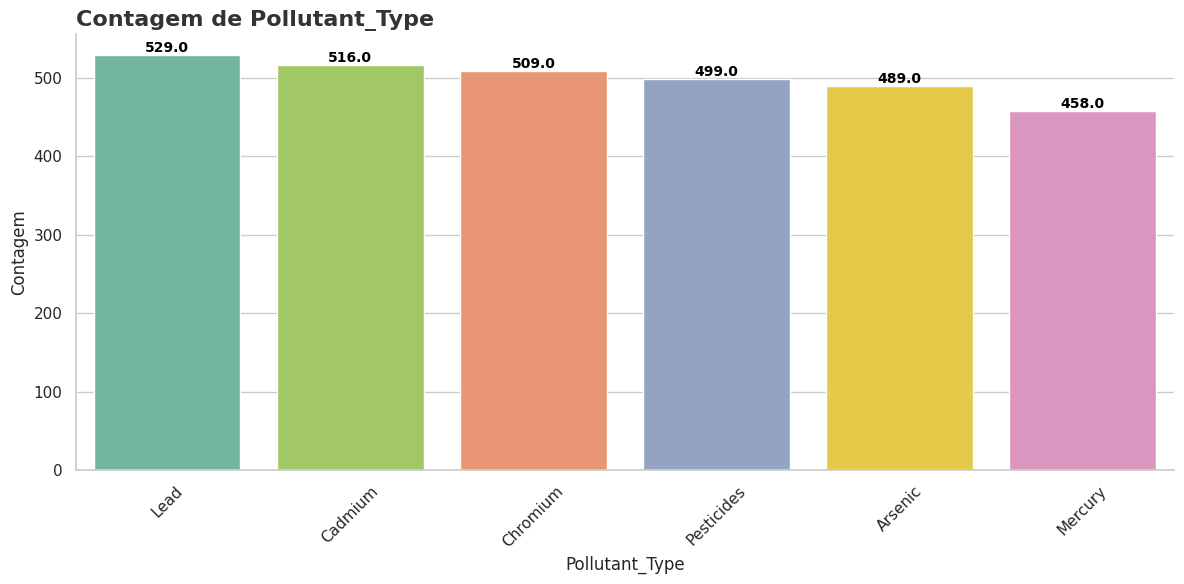

In [13]:
colunas = ['Pollutant_Type', 'Disease_Type', 'Disease_Severity',
           'Health_Symptoms', 'Age_Group_Affected', 'Gender_Most_Affected']

plot_count(df, colunas[0])

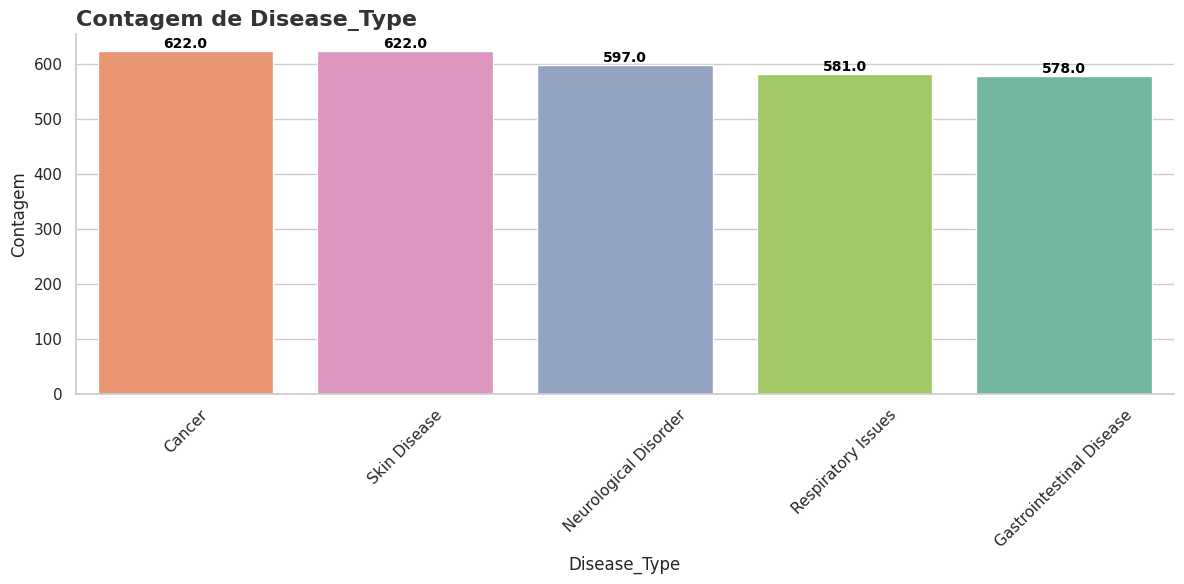

In [14]:
plot_count(df, colunas[1])

## **Analisar a distribuição da severidade das doenças por região.**

In [15]:
def plot_disease_severity_by_region(df):
    # Tema clean
    sns.set_theme(style='whitegrid')

    plt.figure(figsize=(12, 6))
    ax = sns.countplot(
        x='Region',
        hue='Disease_Severity',
        data=df, palette='Set2'
    )

    # Estilização dos textos e layout
    ax.set_title('Distribuição da Severidade das Doenças por Região',
                 fontsize=16, weight='bold', color='#333333', loc='left')
    ax.set_xlabel('Região', fontsize=12)
    ax.set_ylabel('Contagem', fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    ax.legend(title='Severidade da Doença', bbox_to_anchor=(1, 1))

    # Adiciona os valores acima das barras com separador de milhar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:,}', # separador de milhar
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9,
                        fontweight='semibold', color='black')

    sns.despine()  # Remove bordas superiores e laterais
    plt.tight_layout()
    plt.show()

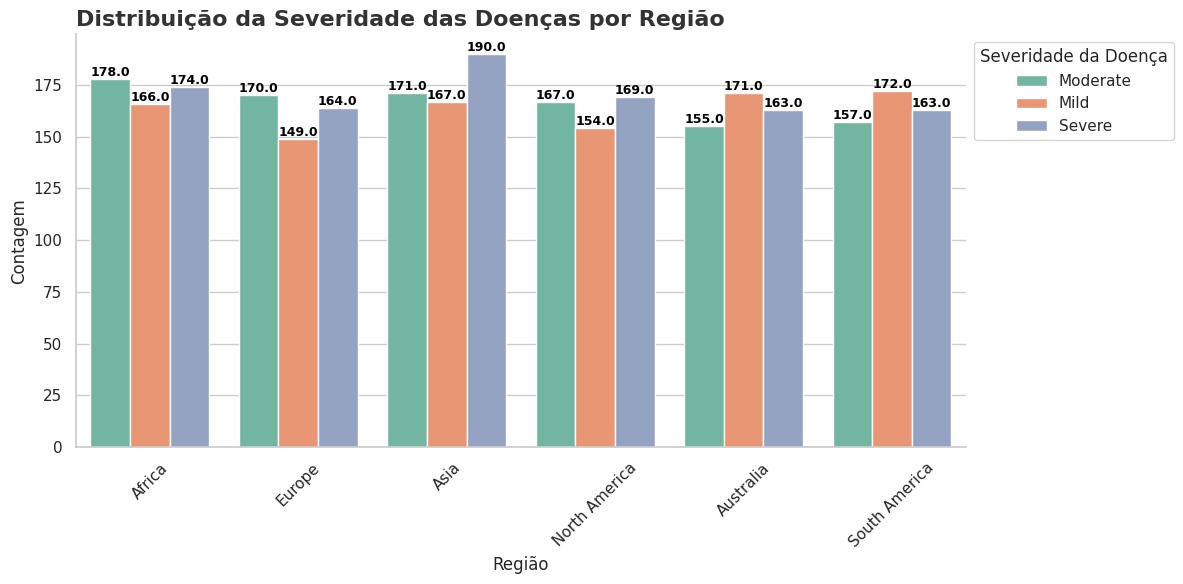

In [16]:
plot_disease_severity_by_region(df)

## **Verificar correlação entre concentração de poluentes e severidade das doenças.**

In [17]:
def plot_correlation_matrix(df, coluna):
    sns.set_theme(style='whitegrid')

    # Copiar o DataFrame para evitar modificar o original
    df_corr = df.copy()

    # Mapeando severidade para valores numéricos com ordem consistente
    valores_unicos = sorted(df[coluna].unique())
    colunmn_mapping = {valor: i for i, valor in enumerate(valores_unicos)}

    # Criar coluna codificada
    df_corr[f'{coluna}_Num'] = df_corr[coluna].map(colunmn_mapping)

    # Calcular correlação
    correlation = df_corr['Pollutant_Concentration_mg_kg'].corr(df_corr[f'{coluna}_Num'])

    # Plotar gráfico
    plt.figure(figsize=(10, 6))
    ax = sns.regplot(
        data=df_corr,
        x='Pollutant_Concentration_mg_kg',
        y=f'{coluna}_Num',
        scatter_kws={'alpha': 0.6, 'color': '#4c72b0'},
        line_kws={'color': '#dd8452', 'linewidth': 2}
    )

    # Personalizações
    plt.title(f'Correlação: Concentração de Poluentes × {coluna.replace("_", " ")}\nCoeficiente: {correlation:.2f}',
              fontsize=16, weight='bold', color='#333333')
    plt.xlabel('Concentração de Poluentes (mg/kg)', fontsize=12)
    plt.ylabel(coluna.replace("_", " "), fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()

    # Substituir ticks numéricos pelo texto original
    ax.set_yticks(list(colunmn_mapping.values()))
    ax.set_yticklabels(list(colunmn_mapping.keys()), fontsize=10)

    sns.despine()  # Remove bordas superiores e laterais
    plt.show()


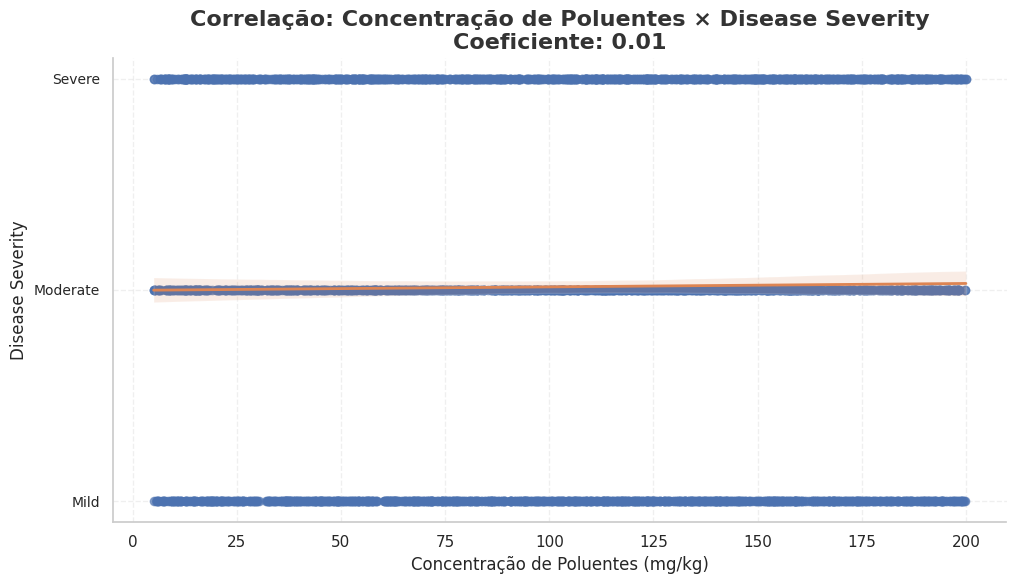

In [18]:
plot_correlation_matrix(df, 'Disease_Severity')

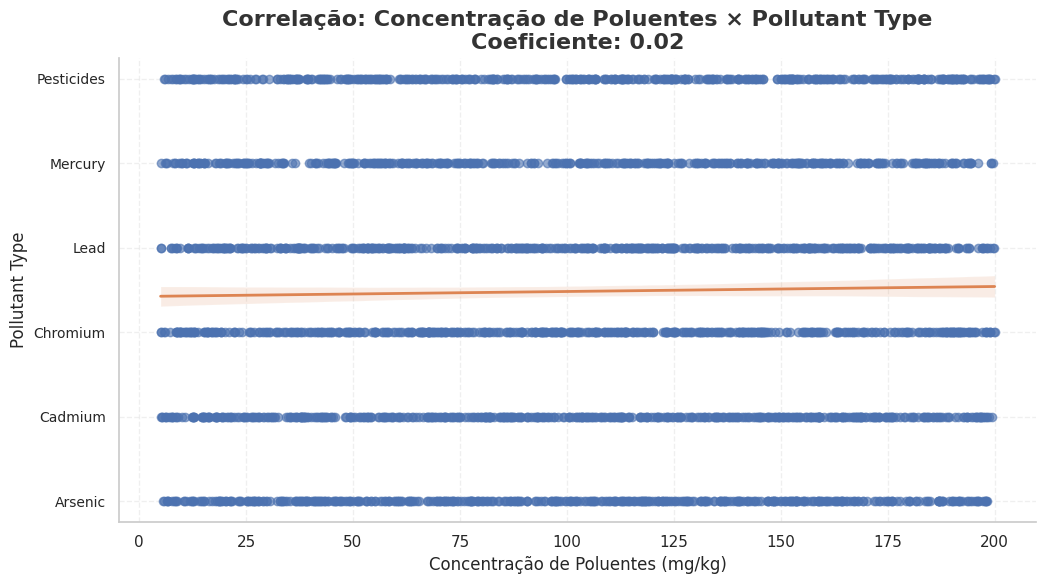

In [19]:
plot_correlation_matrix(df, 'Pollutant_Type')

## **Mapear quais grupos etários são mais afetados por região/poluente.**

In [20]:
def plot_age_group_by_region_pollutant(df):
    # Tema clean
    sns.set_theme(style='whitegrid')

    plt.figure(figsize=(12, 6))
    ax = sns.countplot(
        x='Region',
        hue='Age_Group_Affected',
        data=df, palette='Set2'
    )


    ax.set_title('Faixas etárias afetadas por região',
                 fontsize=16, weight='bold', color='#333333', loc='left')
    ax.set_xlabel('Região')
    ax.set_ylabel('Contagem')
    ax.tick_params(axis='x', labelrotation=45)
    ax.legend(title='Faixa etária', bbox_to_anchor=(1, 1))

    # Adiciona os valores acima das barras com separador de milhar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:,}', # separador de milhar
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9,
                        fontweight='semibold', color='black')

    sns.despine()  # Remove bordas superiores e laterais
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    ax = sns.countplot(
        x='Pollutant_Type',
        hue='Age_Group_Affected',
        data=df, palette='Set2'
    )
    ax.set_title('Faixas etárias afetadas pelo tipo de poluição',
                 fontsize=16, weight='bold', color='#333333', loc='left')
    ax.set_xlabel('Tipo de poluente')
    ax.set_ylabel('Contagem')
    ax.tick_params(axis='x', labelrotation=45)
    ax.legend(title='Faixa etária', bbox_to_anchor=(1, 1))

    # Adiciona os valores acima das barras com separador de milhar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:,}', # separador de milhar
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9,
                        fontweight='semibold', color='black')

    sns.despine()  # Remove bordas superiores e laterais
    plt.tight_layout()
    plt.show()

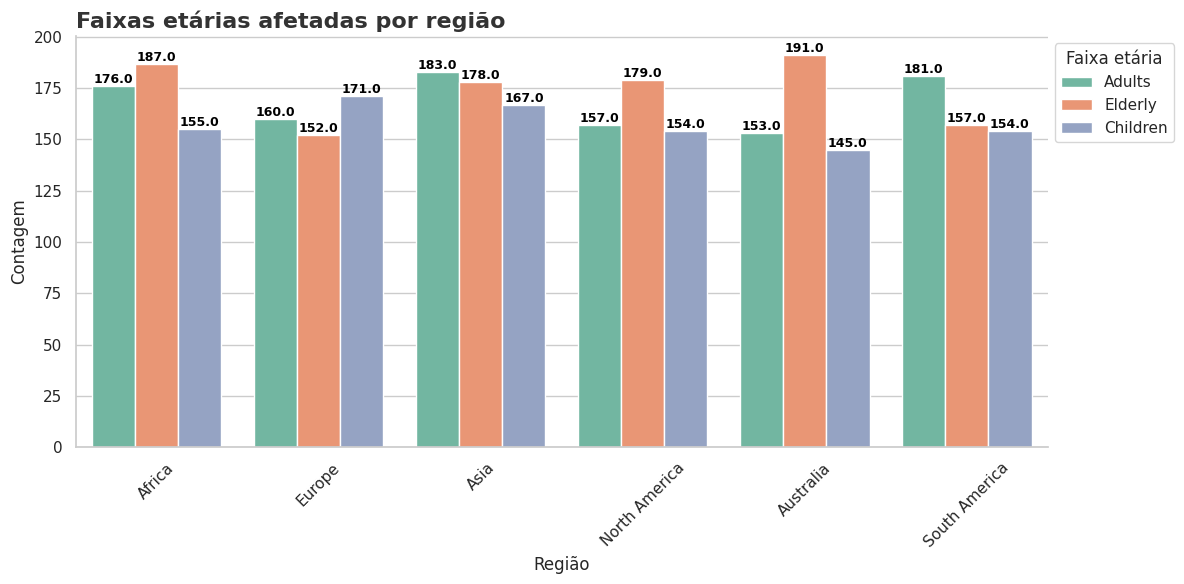

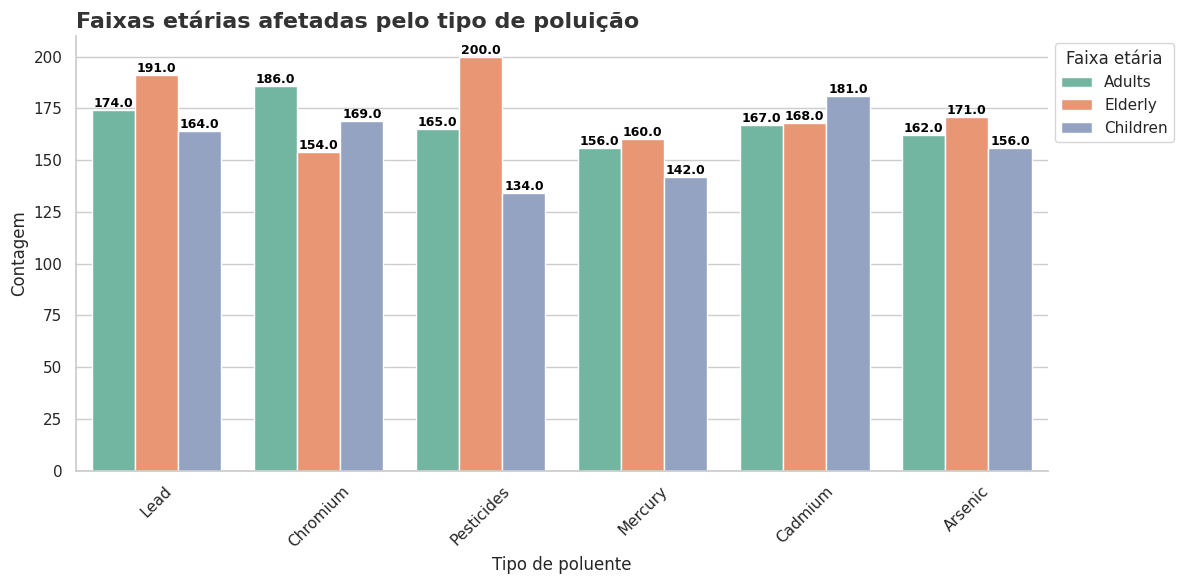

In [21]:
plot_age_group_by_region_pollutant(df)

# **Visualizações Interativas**
---

## **Gráfico de torta com os tipos de poluentes mais comuns.**

In [22]:
def plot_pollutant_distribution(df):
    # Contar os tipos de poluentes mais comuns
    pollutant_counts = df['Pollutant_Type'].value_counts().reset_index()
    pollutant_counts.columns = ['Pollutant_Type', 'Count']

    # Criar gráfico de pizza com Plotly (estilizado)
    fig = px.pie(
          pollutant_counts, values='Count', names='Pollutant_Type',
          title='💥 Distribuição dos Tipos de Poluentes no Solo',
          color_discrete_sequence=px.colors.qualitative.Set3,
          hole=0.4
        )

    fig.update_traces(
          textposition='inside',
          textinfo='percent+label',
          pull=[0.02]*len(pollutant_counts),  # efeito de "afastamento"
          marker=dict(line=dict(color='#000000', width=1))  # borda nas fatias
      )

    fig.update_layout(
          title_font_size=20,
          title_x=0.5,
          font=dict(size=14),
          showlegend=False,
          paper_bgcolor='white'
      )

    fig.show()

In [23]:
plot_pollutant_distribution(df)

## **Criar um mapa de calor para mostrar a concentração de poluentes por país.**

In [24]:
def plot_heatmap_by_country(df, geojson_path, tiles='cartodb positron', fill_opacity=0.7):

    required_cols = {'Country', 'Pollutant_Concentration_mg_kg'}
    if not required_cols.issubset(df.columns):
        raise ValueError(f"O DataFrame deve conter as colunas: {required_cols}")

    # Carregar e filtrar o GeoJSON
    with open(geojson_path, 'r', encoding='utf-8') as f:
        geojson_data = json.load(f)

    # Filtrar os países do GeoJSON
    countries = df['Country'].unique().tolist()
    geojson_data['features'] = [
        feature for feature in geojson_data['features']
        if feature['properties']['name'] in countries
    ]

    # Calcular a média de poluentes por país
    pollution_data = df.groupby('Country')['Pollutant_Concentration_mg_kg'].mean().reset_index()



    # Criar mapa base
    f_map  = folium.Figure(width=1300, height=500)
    base_map = folium.Map(
            location=[20, 0],
            zoom_start=2.2,
            min_zoom=2.2,
            max_zoom=2.2,
            tiles=tiles,
            zoom_control=False
        ).add_to(f_map)

    # Mapa coroplético
    choropleth = folium.Choropleth(
        geo_data=geojson_data,
        name='choropleth',
        data=pollution_data,
        columns=['Country', 'Pollutant_Concentration_mg_kg'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=fill_opacity,
        line_opacity=0.5,
        legend_name='Concentração Média de Poluentes (mg/kg)',
        highlight=True
    ).add_to(base_map)

    # Adicionar valores ao GeoJSON para uso no tooltip
    for feature in choropleth.geojson.data['features']:
        name = feature['properties']['name']
        value = pollution_data.loc[pollution_data['Country'] == name, 'Pollutant_Concentration_mg_kg']
        feature['properties']['Pollutant_Concentration_mg_kg'] = round(value.values[0], 2) if not value.empty else "N/A"



    # Adicionar Tooltip personalizada
    folium.GeoJsonTooltip(
        fields=['name', 'Pollutant_Concentration_mg_kg'],
        aliases=['País:', 'Concentração Média (mg/kg):'],
        sticky=False,
        labels=True,
        style=(
            "background-color: #f9f9f9;"
            "border: 1px solid #333;"
            "border-radius: 5px;"
            "padding: 5px;"
        )
    ).add_to(choropleth.geojson)


    # Exibir o mapa
    return base_map

In [25]:
geojson_path = '/content/drive/MyDrive/Aulas/Projetos/Soil Pollution Diseases/Data/custom.geo.json'

In [26]:
mapa = plot_heatmap_by_country(df, geojson_path)
mapa

## **Criar gráficos de linha para mostrar tendências temporais (usando Date_Reported).**

In [27]:
def plot_temporal_trends(df, column_to_plot):

    # Garantir que a coluna de data está em formato datetime
    if not pd.api.types.is_datetime64_any_dtype(df['Date_Reported']):
        df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])

    # Agrupar por data e calcular a média
    temporal_data = df.groupby('Date_Reported')[column_to_plot].mean().reset_index()

    # Criar gráfico de linha suavizada
    fig = px.line(
        temporal_data,
        x='Date_Reported',
        y=column_to_plot,
        title=f'📈 Tendência Temporal de {column_to_plot.replace("_", " ").title()}',
        labels={
            'Date_Reported': 'Data',
            column_to_plot: 'Média'
        },
        markers=True
    )

    # Estilizar layout
    fig.update_layout(
        title_font_size=22,
        title_x=0.5,
        font=dict(size=13),
        xaxis=dict(
            tickformat='%b %Y',
            title='Data'
        ),
        yaxis=dict(title='Média'),
        plot_bgcolor='white',
        hovermode='x unified'
    )

    fig.show()


In [28]:
plot_temporal_trends(df, 'Pollutant_Concentration_mg_kg')
plot_temporal_trends(df, 'Soil_pH')

# **Modelagem**
---

In [29]:
def train_disease_severity_model (df):
    # Verificar colunas obrigatórias
    required_columns = ['Disease_Severity', 'Soil_pH', 'Pollutant_Concentration_mg_kg',
                        'Rainfall_mm', 'Temperature_C', 'Humidity_%', 'Soil_Texture']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Dataset precisa conter as colunas: {required_columns}")

    # Remover valores ausentes
    df = df.dropna(subset=required_columns)

    # Codificar alvo
    label_encoder = LabelEncoder()
    df['Disease_Severity_Encoded'] = label_encoder.fit_transform(df['Disease_Severity'])

    # Selecionar preditores e codificar variáveis categóricas
    features = ['Soil_pH', 'Pollutant_Concentration_mg_kg',
                'Rainfall_mm', 'Temperature_C', 'Humidity_%', 'Soil_Texture']
    X = pd.get_dummies(df[features], drop_first=True)
    y = df['Disease_Severity_Encoded']

    # Dividir dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Padronizar (opcional para Random Forest, mas pode ajudar em outros modelos)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Treinar modelo
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predição
    y_pred = model.predict(X_test_scaled)

    # Avaliação
    print("📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # 📌 Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title("Matriz de Confusão - Severidade da Doença")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    # 📌 Importância dos atributos
    importances = pd.Series(model.feature_importances_, index=X.columns)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances.sort_values(ascending=False),
                y=importances.sort_values(ascending=False).index,
                palette="YlOrRd" ,hue=importances.sort_values(ascending=False).index)
    plt.title("Importância dos Atributos Ambientais")
    plt.xlabel("Importância")
    plt.ylabel("Atributo")
    plt.tight_layout()
    plt.show()


📊 Relatório de Classificação:
              precision    recall  f1-score   support

        Mild       0.33      0.34      0.33       196
    Moderate       0.36      0.35      0.36       200
      Severe       0.37      0.36      0.36       204

    accuracy                           0.35       600
   macro avg       0.35      0.35      0.35       600
weighted avg       0.35      0.35      0.35       600



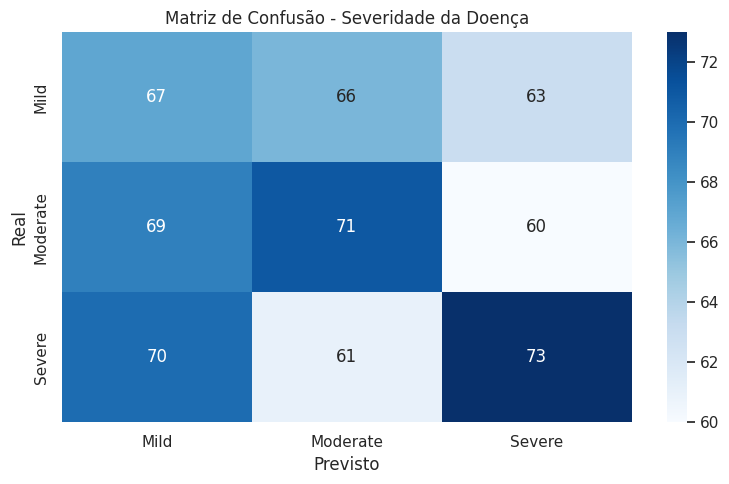

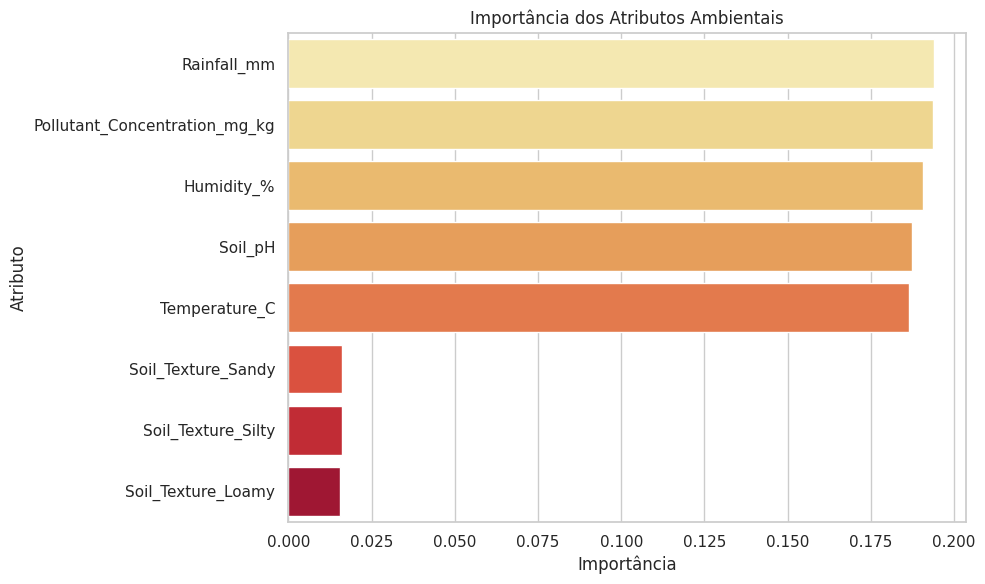

In [30]:
train_disease_severity_model(df)

# **Conclusão**
---

- Foi possível identificar as principais variáveis associadas à poluição do solo e ao surgimento de doenças.
- O modelo Random Forest apresentou uma boa performance na classificação.
- O uso de visualizações ajudou a compreender a distribuição dos dados e suas relações.
---

**Fim do notebook.**
